In [331]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge , LinearRegression , Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler

In [332]:
data = pd.read_csv('./prices.csv')
data

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [333]:
data['symbol'].describe()

count     851264
unique       501
top          AIV
freq        1762
Name: symbol, dtype: object

In [334]:
data['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [335]:
data = data[data['symbol']=='AIV']
data = data.sort_values(by=['date']) 

In [336]:
x = np.arange(0,1762).reshape(-1,1)
y = data['open']
y.shape

(1762,)

Text(0, 0.5, 'Price')

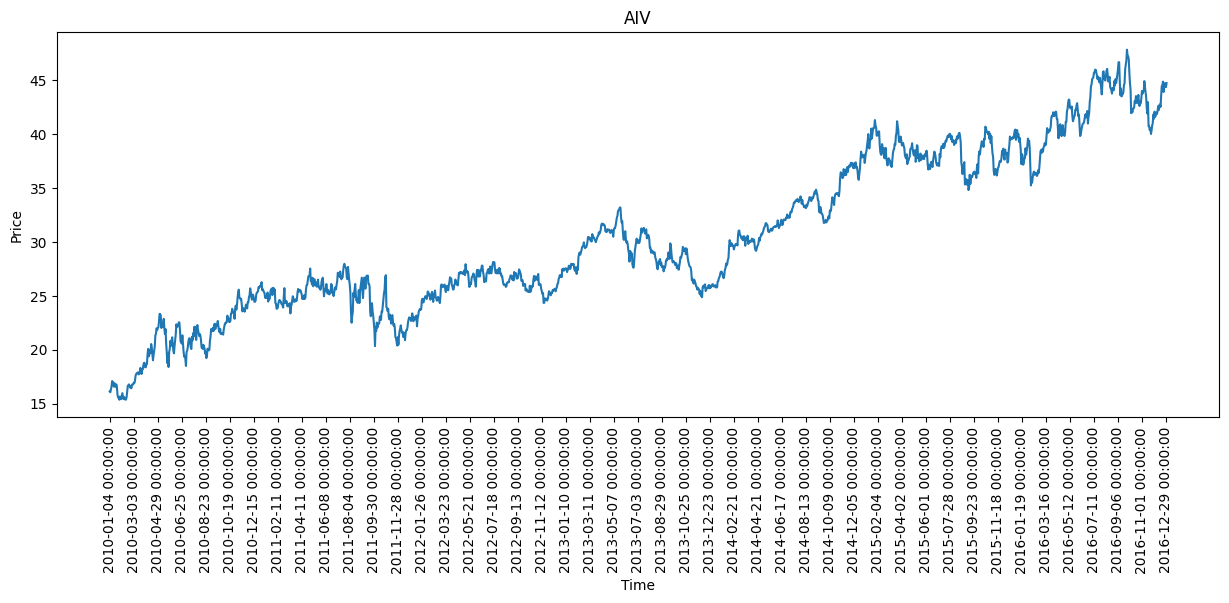

In [337]:


plt.figure(figsize=(15,5))
plt.plot(data['date'],data['open'])
plt.xticks(np.arange(0,1762,40),rotation=90)
plt.title('AIV')
plt.xlabel('Time')
plt.ylabel('Price')



In [338]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [339]:
model.score(x,y)

0.8972924643549265

In [340]:
model.coef_,model.intercept_

(array([0.01375884]), np.float64(18.321752356482055))

In [341]:
y_model = model.coef_*x+model.intercept_

Text(0, 0.5, 'Price')

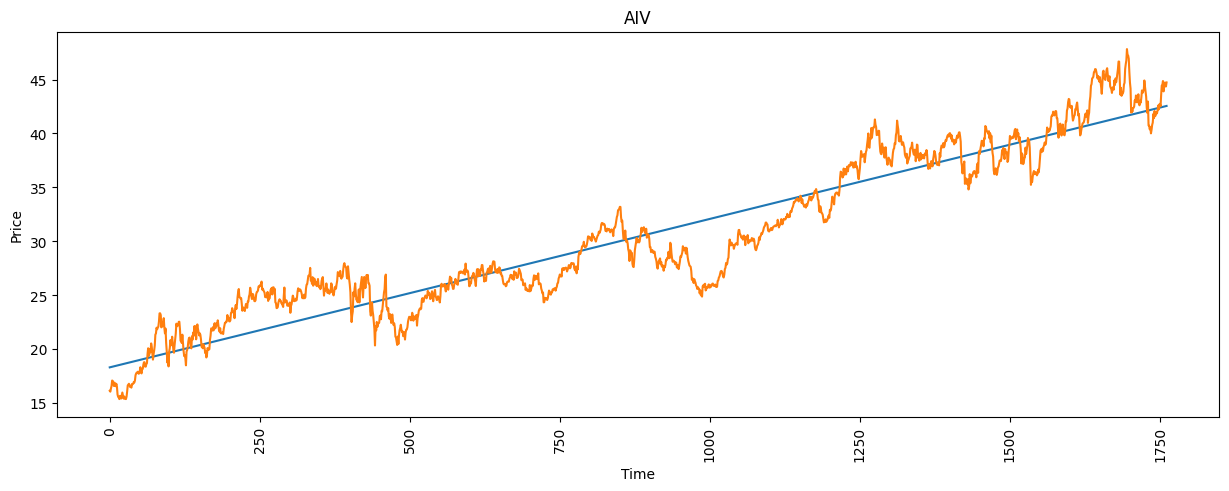

In [342]:
plt.figure(figsize=(15,5))
plt.plot(x,y_model)
plt.plot(x,data['open'])
plt.xticks(rotation=90)
plt.title('AIV')
plt.xlabel('Time')
plt.ylabel('Price')

In [343]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2)
X_train.shape

(1409, 1)

In [344]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [345]:
model.score(X_train,y_train)

0.8940079201964102

In [346]:
model.score(X_test,y_test)

0.9085920471460955

In [347]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)

In [348]:
mean_absolute_error(y_train,p_train)

1.9511761491694557

In [349]:
mean_absolute_error(y_test,p_test)


1.8669180367491602